# Рекуррентные нейронные сети (RNN)

## Что мы изучим на этом занятии?

* Что такое рекуррентная нейронная сеть (RNN)?
* Для чего используются RNN?
* Типы рекуррентных нейронных сетей
* Простая RNN
* LSTM
* GRU

## Что такое рекуррентная нейронная сеть?

Рекуррентная нейронная сеть (англ. Recurrent Neural Network, RNN) — это тип нейронной сети, который позволяет обрабатывать последовательные данные, такие как текст, временные ряды или аудиосигналы. Основная особенность RNN заключается в том, что она имеет циклические связи, позволяющие ей сохранять информацию о предыдущих входных данных и использовать её для обработки текущих.



rnn_seq_to_seq.svg

[Источник](http://vbystricky.ru/2021/05/rnn_lstm_gru_etc.html)

Основные характеристики RNN:

1. *Последовательная обработка*

    RNN обрабатывает входные данные по одному элементу за раз, что делает её подходящей для задач, где порядок имеет значение.

2. *Внутреннее состояние*

    RNN имеет внутреннее состояние (или память), которое обновляется с каждым новым входом. Это состояние помогает сети запоминать информацию о предыдущих входах.

3. *Обратная связь*

    Циклы в архитектуре RNN позволяют ей передавать информацию обратно в сеть, что дает возможность учитывать предшествующие данные при обработке текущего входа.

Предположим, у нас есть последовательность слов: "Я люблю искусственный интеллект". RNN может обрабатывать это предложение, запоминая каждое слово и его контекст, чтобы в конечном итоге понять смысл всего предложения.

## Для чего используются RNN?

RNN (рекуррентные нейронные сети) используются в различных задачах, связанных с последовательными данными. Вот некоторые из основных применений RNN:

### Обработка естественного языка (NLP)
- **Машинный перевод**: RNN могут переводить текст с одного языка на другой, учитывая контекст предложений.
- **Генерация текста**: Они могут создавать новые тексты, основываясь на заданном начальном фрагменте или стиле.
- **Анализ тональности**: RNN помогают определять эмоциональную окраску текста, например, положительная или отрицательная оценка.

### Распознавание речи
- **Обработка аудиосигналов**: RNN могут использоваться для преобразования звуковых волн в текст, распознавая последовательности фонем и слов.

### Временные ряды
- **Прогнозирование**: RNN могут анализировать исторические данные (например, финансовые показатели, погодные условия) и предсказывать их будущие значения на основе последовательности наблюдений.

### Обработка последовательностей
- **Музыкальная композиция**: RNN могут генерировать мелодии, изучая музыкальные последовательности и аккорды.
- **Изображения**: Некоторые RNN могут использоваться для обработки последовательностей кадров в видео, помогая в задачах, связанных с анализом движений.

### Аномалия и детекция
- **Обнаружение аномалий**: RNN могут анализировать последовательные данные, такие как сетевые трафики, и выявлять необычные паттерны, что полезно для кибербезопасности.

### Игры и симуляции
- **Игровые агенты**: RNN могут использоваться в системах искусственного интеллекта для создания агентов, способных адаптироваться к изменяющимся условиям игры, принимая решения на основе предшествующего опыта.

## Типы рекуррентных нейронных сетей

Существует несколько типов рекуррентных нейронных сетей (RNN), каждая из которых имеет свои особенности, преимущества и недостатки. Вот основные типы RNN:

1. Простая RNN
2. LSTM (Long Short-Term Memory)
3. GRU (Gated Recurrent Unit)

Далее мы поговорим про каждую из них более подробно.

## Простая RNN

Простая RNN — это базовый тип рекуррентной нейронной сети, который работает с последовательными данными, передавая информацию от одного временного шага к следующему. RNN обновляет своё внутреннее состояние (или скрытое состояние), которое "помнит" информацию о предыдущих шагах, и затем использует это состояние для обработки текущего входа. Это позволяет RNN учитывать контекст при обработке последовательностей, таких как текст или временные ряды.

rnn_with_recurrent_link (1).svg

[Источник](http://vbystricky.ru/2021/05/rnn_lstm_gru_etc.html)

Основная структура RNN на каждом временном шаге включает:
* Вектор **входного состояния** $x_t$, представляющий текущий элемент последовательности на шаге $t$.
* Вектор **скрытого состояния** $h_t$, который хранит информацию о предыдущих шагах. Он обновляется на каждом временном шаге и сохраняет "память" о предшествующих элементах.
* Вектор **выходного состояния** $y_t$, сгенерированный сетью на каждом шаге.

Формула обновления скрытого состояния в RNN выглядит так:

$$
h_t = \sigma(W_{xh} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h)
$$

где:
- $W_{xh}$ — матрица весов, применяемая к текущему входу $x_t$,
- $W_{hh}$ — матрица весов, применяемая к предыдущему скрытому состоянию $h_{t-1}$,
- $b_h$ — вектор смещения,
- $\sigma$ — активационная функция (обычно $\text{tanh}$ или $\text{ReLU}$).

На выходе может быть ещё одна формула:

$$
y_t = \sigma(W_{hy} \cdot h_t + b_y)
$$

где $W_{hy}$ — матрица весов, связывающая скрытое состояние с выходом, а $b_y$ — смещение для выхода.

**Преимущества**:
- Простота: модель понятна и легко реализуется.
- Подходит для работы с последовательными данными небольших размеров.

**Недостатки**:
- Проблемы с долгосрочной зависимостью: трудности в запоминании информации на больших расстояниях.
- Склонна к затуханию или взрыву градиентов, что затрудняет обучение на длинных последовательностях.

### Пример простой RNN

Простую RNN можно использовать для классификации текста. Например, мы можем классифицировать текст из датасета Twenty Newsgroups. Давайте посмотрим как мы можем обучить простую RNN классифицировать текст.

Установим необходимые библиотеки

In [ ]:
!pip install torch==2.3.0
!pip install torchtext==0.18

Импортируем модули

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import numpy as np


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

Загрузим датасеты и разделим на тренировочный и тестовый выборки

In [ ]:
# Загрузка данных
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X = newsgroups.data
y = newsgroups.target

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Чтобы мы могли работать с текстом его необходимо **токенизировать**. Токенизация — это процесс разделения текста на отдельные компоненты, называемые токенами. Токены могут быть словами, предложениями, символами или даже частями слов, в зависимости от задачи и выбранного метода токенизации.

Например, текст "Я люблю искусственный интеллект" может превратиться в список слов:  
`["Я", "люблю", "искусственный", "интеллект"]`

Для токенизации мы используем [токенизатор](https://pytorch.org/text/main/data_utils.html) из torchtext.

In [ ]:
# Токенизация текста
tokenizer = get_tokenizer("basic_english")

def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

Токены после токенизации необходимо перевести в **индексы** с помощью **словаря**. Модели не могут работать с текстом напрямую; они работают с числовыми данными. Поэтому словарь помогает преобразовать текст в числа, с которыми модели могут работать.

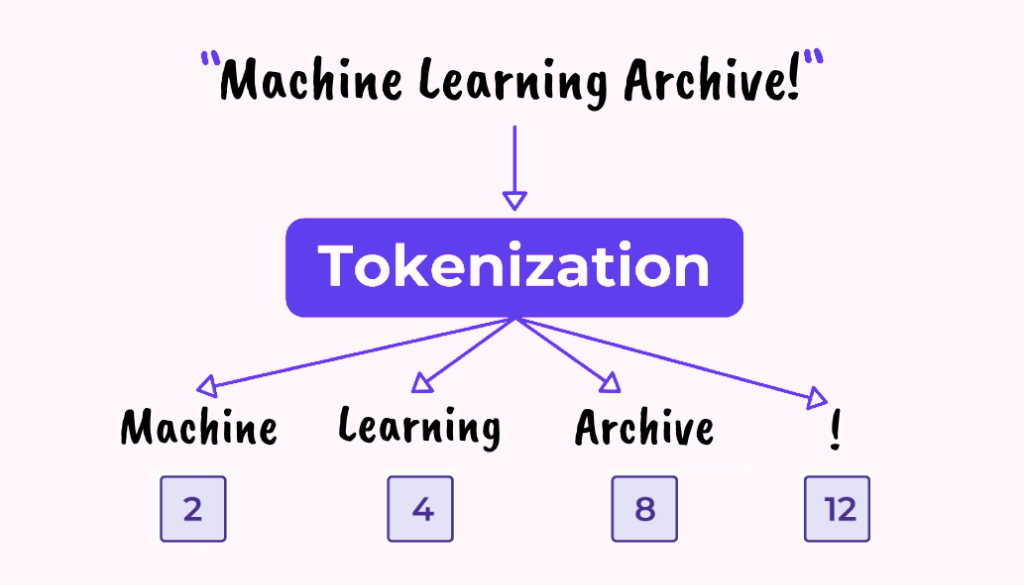

[Источник](https://mlarchive.com/natural-language-processing/tokenization-the-cornerstone-for-nlp-tasks/)

Каждому уникальному слову или токену в тексте присваивается уникальный индекс. Например, если в тексте встречаются слова "привет", "мир", то словарь может преобразовать их в индексы 1 и 2, соответственно.

В словаре часто есть специальный токен для редких или неизвестных слов (например, `<UNK>` или "unknown"), который используется, если модель встречает слово, отсутствующее в словаре.

Также, используется `<PAD>` токен для "заполнения" последовательностей, чтобы все они имели одинаковую длину. Этот процесс называется padding.

Тексты и предложения в наборах данных могут сильно отличаться по длине, но для работы с нейронными сетями и пакетной обработкой нужно, чтобы все последовательности в батче имели одинаковую длину. `<PAD>` добавляется к более коротким последовательностям, чтобы уравнять их длину с самой длинной последовательностью в батче.

Мы создадим словарь с помощью [`build_vocab_from_iterator`](https://pytorch.org/text/stable/vocab.html) из torchtext.

In [ ]:
# Построение словаря
vocab = build_vocab_from_iterator(
    yield_tokens(X_train),
    specials=["<unk>", "<pad>"]
)
vocab.set_default_index(vocab["<unk>"])

unk_index = vocab["<unk>"]
print("UNK index:", unk_index)
pad_index = vocab["<pad>"]
print("PAD index:", pad_index)

Подготовим метки

In [ ]:
# Преобразование меток в числовые значения
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

Создадим пользовательский датасет

In [ ]:
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TextDataset(X_train, y_train_encoded)
test_dataset = TextDataset(X_test, y_test_encoded)

Создадим DataLoader-ы. Их важность в том, что при загрузке батчей в `collate_fn` они предобрабатывают данные:

1. Токенизируют текст
2. Переводят токены в индексы в словаре
3. Если количество токенов в тексте меньше `max_length`, то добавляются `<pad>` токены. Иначе, текст обрезается до максимальной длины.
4. Создаются тензоры

In [ ]:
max_length = 128

# Преобразование текста в индексы токенов
def text_pipeline(x):
    return vocab(tokenizer(x))

def collate_fn(batch):
    texts, labels = zip(*batch)
    sequences = []
    for text in texts:
        tokenized_text = text_pipeline(text)
        if len(tokenized_text) > max_length:
            tokenized_text = tokenized_text[:max_length]
        else:
            tokenized_text += [pad_index] * (max_length - len(tokenized_text))
        sequences.append(tokenized_text)
    return torch.tensor(sequences, dtype=torch.long), torch.tensor(labels, dtype=torch.long)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, collate_fn=collate_fn)

Создадим простую RNN, состоящую из:

* Embedding слоя
* RNN слоя
* Два полносвязных слоя

С двумя последними слоями мы уже с вами познакомились. Но что такое Embedding слой?

Embedding слой — это слой нейронной сети, используемый для преобразования дискретных целочисленных индексов, представляющих слова (или токены), в плотные, непрерывные векторы чисел. Он позволяет представить слова в виде векторов фиксированной длины, содержащих информацию о смысловой близости слов. Рекуррентный слой затем принимает эти векторы на вход и обрабатывает.

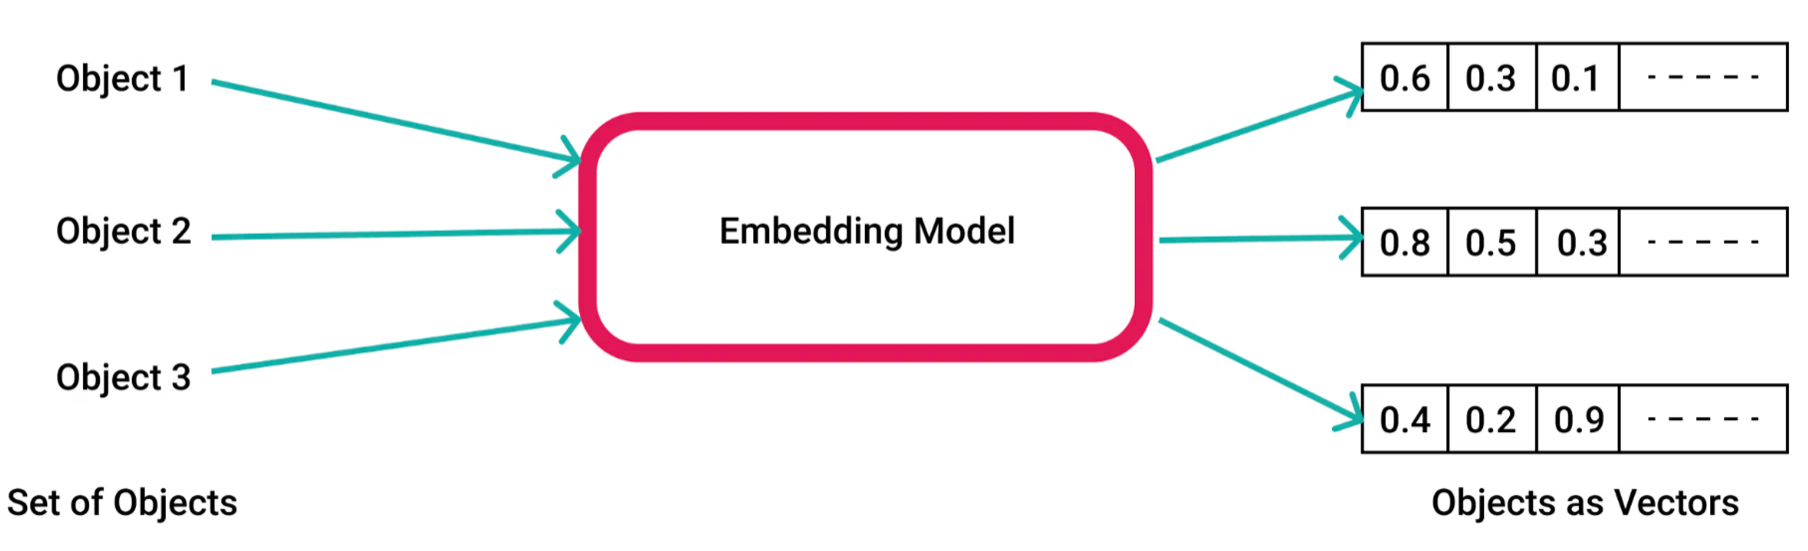

[Источник](https://deepgram.com/ai-glossary/embedding-layer)

In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(
            input_size=embed_size,
            hidden_size=hidden_size,
            nonlinearity='relu',
            bias=False,
            batch_first=True
        )
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.embedding(x)
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        out, _ = self.rnn(x, h0)
        avg_out = torch.mean(out, dim=1)
        out = self.relu(self.dropout(self.fc1(avg_out)))
        out = self.softmax(self.fc2(out))
        return out

Инициализируем модель и создадим функцию потерь и оптимизатор

In [ ]:
# Параметры модели
vocab_size = len(vocab)
embed_size = 512
hidden_size = 512
output_size = len(np.unique(y_train_encoded))

model = SimpleRNN(vocab_size, embed_size, hidden_size, output_size)
model = model.to(device)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Обучим модель

In [ ]:
from tqdm import tqdm

# Обучение модели
num_epochs = 10

for epoch in range(num_epochs):
    model.train()

    running_loss = 0.0
    pbar = tqdm(train_loader)

    for X_batch, y_batch in pbar:

        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()

        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        pbar.set_description(f"Loss: {loss.item():.4f}")

    epoch_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Epoch Loss: {epoch_loss:.4f}')


Посчитаем macro F1 score

In [ ]:
from sklearn.metrics import f1_score

# Оценка модели
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# Вычисление macro F1 score
macro_f1 = f1_score(all_labels, all_preds, average='macro')
print(f'Test Macro F1 Score: {macro_f1:.4f}')

## LSTM (Long Short-Term Memory)

LSTM (Long Short-Term Memory) — это тип рекуррентной нейронной сети (RNN), разработанный для решения проблемы долгосрочной зависимости, с которой сталкиваются стандартные RNN. Простая RNN не способна эффективно запоминать информацию на длинных временных интервалах из-за проблемы затухающих градиентов. LSTM решает эту проблему с помощью особой архитектуры, которая включает так называемые "ячейки памяти" и механизмы "ворот" (gates), контролирующих поток информации.

lstm.svg

[Источник](http://vbystricky.ru/2021/05/rnn_lstm_gru_etc.html)

Пусть на временном шаге $t$:
- $x_t$ — текущий вход,
- $h_{t-1}$ — предыдущее скрытое состояние,
- $C_{t-1}$ — предыдущее состояние ячейки памяти.

LSTM выполняет следующие шаги:

1. **Затвор забывания**: Определяет, какую часть информации из ячейки памяти следует забыть.

   $$
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
   $$

   где $W_f$ — веса, $b_f$ — смещение, и $\sigma$ — сигмоида, которая возвращает значения от 0 до 1 (решает, что забывать).

2. **Затвор входа**: Определяет, какую часть новой информации добавить в ячейку памяти.

   $$
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
   $$

   где $W_i$ и $b_i$ — веса и смещение для затвора входа.

   Также вычисляется $\tilde{C}_t$, представляющая кандидата на новое состояние ячейки памяти:

   $$
   \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
   $$

3. **Обновление состояния ячейки памяти**: Состояние ячейки памяти $C_t$ обновляется с учетом забывания старого состояния и добавления нового.

   $$
   C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t
   $$

4. **Затвор выхода**: Определяет, какую часть состояния ячейки памяти использовать для формирования текущего скрытого состояния $h_t$ и выхода.

   $$
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
   $$

   Тогда текущее скрытое состояние $h_t$ вычисляется как:

   $$
   h_t = o_t \cdot \tanh(C_t)
   $$

**Преимущества**:
- Может сохранять долгосрочные зависимости.
- Подходит для задач с временными рядами и последовательностями (например, текст, звук).

**Недостатки**:
- Более сложная архитектура, что делает её медленнее в обучении.
- Склонна к переобучению на небольших наборах данных.

### Пример LSTM

LSTM также можно использовать для классификации. Если мы используем тот же датасет Twenty Newsgroups, то большая часть кода не поменяется с использованием LSTM. Поменяется лишь класс модели:

```python
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(
            input_size=embed_size,
            hidden_size=hidden_size,
            bias=False,
            batch_first=True
        )
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.embedding(x)
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        avg_out = torch.mean(out, dim=1)
        out = self.relu(self.dropout(self.fc1(avg_out)))
        out = self.softmax(self.fc2(out))
        return out
```

## GRU (Gated Recurrent Unit)


GRU (Gated Recurrent Unit) — это тип рекуррентной нейронной сети, похожий на LSTM, но с более простой архитектурой. GRU была разработана для решения тех же задач, что и LSTM, — запоминания длинных зависимостей, — но с меньшим количеством параметров, что делает её быстрее и менее ресурсоёмкой в обучении. В GRU используются двое ворот (update gate и reset gate) вместо трёх, что делает её проще, чем LSTM.

gru.svg

[Источник](http://vbystricky.ru/2021/05/rnn_lstm_gru_etc.html)

Пусть на временном шаге $t$:
- $x_t$ — текущий входной вектор,
- $h_{t-1}$ — скрытое состояние из предыдущего шага.

1. **Сбрасывающий затвор** $r_t$ определяет, сколько информации из предыдущего состояния скрытого слоя сохранить.

   $$
   r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b_r)
   $$

   где $W_r$ — весовая матрица, $b_r$ — смещение, и $\sigma$ — сигмоида.

2. **Обновляющий затвор** $z_t$ решает, какую часть предыдущего скрытого состояния перенести в текущее состояние

   $$
   z_t = \sigma(W_z \cdot [h_{t-1}, x_t] + b_z)
   $$

3. **Кандидат на новое состояние** $\tilde{h}_t$ определяет возможное новое скрытое состояние, которое затем будет использоваться вместе с обновляющим затвором для формирования нового состояния

   $$
   \tilde{h}_t = \tanh(W \cdot [r_t \cdot h_{t-1}, x_t] + b)
   $$

4. : Обновляющий затвор $z_t$ управляет сочетанием предыдущего состояния $h_{t-1}$ и нового кандидата $\tilde{h}_t$ и **обновляет скрытое состояние** $h_t$

   $$
   h_t = z_t \cdot h_{t-1} + (1 - z_t) \cdot \tilde{h}_t
   $$

**Преимущества**:
- Меньше параметров по сравнению с LSTM, что делает её быстрее в обучении и более экономичной в вычислениях.
- Способна эффективно обрабатывать последовательные данные и учитывать долгосрочные зависимости.

**Недостатки**:
- Меньшая гибкость, чем у LSTM, так как у GRU нет отдельного состояния ячейки памяти. В некоторых задачах это может ограничивать её возможности.

### Пример GRU

GRU также можно использовать для классификации. Если мы используем тот же датасет Twenty Newsgroups, то большая часть кода не поменяется с использованием GRU. Поменяется лишь класс модели:

```python
class GRUClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(GRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.gru = nn.GRU(
            input_size=embed_size,
            hidden_size=hidden_size,
            bias=False,
            batch_first=True
        )
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.embedding(x)
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        avg_out = torch.mean(out, dim=1)
        out = self.relu(self.dropout(self.fc1(avg_out)))
        out = self.softmax(self.fc2(out))
        return out
```

## Упражнение 1

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше и в предыдущих занятиях*

В данном упражнении вам необходимо обучить GRU модель классифицировать текст из датасета [IMDB](https://ai.stanford.edu/~amaas/data/sentiment/), состоящий из отзывов на различные фильмы и их настроение (положительное или отрицательное).

Импортируем модули

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchtext.datasets import IMDB
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import numpy as np
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

Определим девайс

In [ ]:
# Проверяем, доступен ли GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Загрузим датасет

In [ ]:
# Загрузка данных
train_iter = IMDB(split='train')

Создадим токенизатор

In [ ]:
# basic_english токенизатор с помощью get_tokenizer
tokenizer = ...

# Генератор, выдающий токенизированный текст
def yield_tokens(data_iter):
    ...

Создадим словарь

In [ ]:
# Построение словаря со специальными токенами <unk> и <pad>
vocab = ...

# Зададим индекс по умолчанию для неизвестных слов
...

unk_index = vocab["<unk>"]
print("UNK index:", unk_index)
pad_index = vocab["<pad>"]
print("PAD index:", pad_index)

Создадим класс для датасета

In [ ]:
# Пользовательский класс для датасета
class TextDataset(Dataset):
    def __init__(self, data_iter):
        self.labels = [item[0] - 1 for item in data_iter]
        self.texts = [item[1] for item in data_iter]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

train_dataset = TextDataset(train_iter)

# Разделение данных на тренировочный и валидационный наборы
train_data, val_data = train_test_split(list(train_iter), test_size=0.2, random_state=42)

train_dataset.data = train_data
val_dataset = TextDataset(val_data)

Создаем DataLoader-ы

In [ ]:
# Максимальная длина последовательности токенов
max_length = 128

# Функция для преобразования текста в последовательность индексов токенов
def text_pipeline(x):
    # Применяем токенизатор к тексту и преобразуем его в индексы на основе словаря
    ...

# Функция для подготовки батча данных, чтобы все последовательности имели одинаковую длину
def collate_fn(batch):
    # Разделяем текст и метки на отдельные переменные
    texts, labels = zip(*batch)
    sequences = []
    # Обрабатываем каждый текст в батче
    for text in texts:
        # Применяем text_pipeline, чтобы получить индексы токенов для текста
        tokenized_text = ...
        # Если длина текста больше max_length, обрезаем его
        if len(tokenized_text) > max_length:
            tokenized_text = ...
        else:
            # Если длина меньше max_length, добавляем <pad> токены в конец
            tokenized_text += ...
        # Добавляем подготовленную последовательность в список sequences
        sequences.append(tokenized_text)
    # Преобразуем список последовательностей и меток в тензоры для использования в модели
    return ... , ...

# Создаем DataLoader для обучающего набора данных
train_loader = DataLoader(
    train_dataset,         # Датасет для обучения
    batch_size=64,         # Размер батча
    shuffle=True,          # Перемешивание данных для обучения
    collate_fn=collate_fn  # Функция для подготовки батчей (с padding)
)

# Создаем DataLoader для валидационного набора данных
test_loader = DataLoader(
    val_dataset,           # Валидационный датасет
    batch_size=64,         # Размер батча
    shuffle=False,         # Без перемешивания для валидации
    collate_fn=collate_fn  # Функция для подготовки батчей
)


Определяем класс для GRU модели

In [ ]:
# Определение класса классификатора на основе GRU
class GRUClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(GRUClassifier, self).__init__()

        # Сохраняем размер скрытого слоя для инициализации скрытого состояния
        self.hidden_size = hidden_size

        # Слой эмбеддингов: преобразует индексы токенов в плотные векторы размером embed_size
        self.embedding = ...

        # GRU слой: получает эмбеддинги и обрабатывает их для извлечения временной информации
        self.gru = nn.GRU(
            input_size=...,   # размер входа для GRU соответствует размеру эмбеддингов
            hidden_size=..., # размер скрытого состояния
            bias=...,              # отключаем смещение (возможно для упрощения модели)
            batch_first=...         # размер батча должен быть первой размерностью
        )

        # Полносвязный слой для уменьшения скрытого состояния
        self.fc1 = ...

        # Полносвязный слой для преобразования в выходное пространство размером output_size
        self.fc2 = ...

        # Функция активации ReLU
        self.relu = ...

        # Softmax для преобразования выходного вектора в вероятности
        self.softmax = ...

        # Dropout для регуляризации, чтобы уменьшить переобучение
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        # Преобразуем входные токены в эмбеддинги
        x = ...

        # Инициализируем начальное скрытое состояние как тензор нулей
        h0 = ...

        # Пропускаем эмбеддинги через GRU
        out, _ = ...

        # Вычисляем среднее по временной оси (dim=1)
        avg_out = ...

        # Пропускаем через первый полносвязный слой, добавляем Dropout и активацию ReLU
        out = ...

        # Пропускаем через последний полносвязный слой и применяем Softmax для получения вероятностей
        out = ...

        return out


Создаем модель, функцию потерь, и отптимизатор:

In [ ]:
# Параметры модели
vocab_size = len(vocab)
embed_size = 512
hidden_size = 512
output_size = 2  # Для бинарной классификации (положительный/отрицательный)

# Инициализируем модель
model = ...

# Загружаем модель в девайс
model = ...

# Определяем функцию потерь CrossEntropyLoss
criterion = ...

# Определяем оптимизатор Adam с lr=0.001
optimizer = ...

Основной цикл обучения:

In [ ]:
# Задаём количество эпох для обучения
num_epochs = 10

# Начинаем цикл по эпохам
for epoch in range(num_epochs):
    # Устанавливаем режим обучения для модели
    ...

    # Инициализируем переменную для накопления потерь на протяжении эпохи
    running_loss = 0.0

    # Инициализируем индикатор выполнения для визуализации прогресса
    pbar = tqdm(train_loader)

    # Цикл по батчам из тренировочного набора данных
    for X_batch, y_batch in pbar:
        # Переносим входные данные и метки на девайс
        X_batch = ...
        y_batch = ...

        # Обнуляем градиенты перед вычислением нового шага
        ...

        # Вычисляем предсказания модели
        outputs = ...

        # Вычисляем значение функции потерь
        loss = ...

        # Вычисляем градиенты для всех параметров
        ...

        # Обновляем параметры модели на основе вычисленных градиентов
        ...

        # Добавляем значение потерь для текущего батча в накопитель
        running_loss += loss.item()

        # Обновляем отображение прогресса, показывая текущую потерю
        pbar.set_description(f"Loss: {loss.item():.4f}")

    # Вычисляем среднее значение потерь за всю эпоху
    epoch_loss = running_loss / len(train_loader)

    # Выводим информацию о средней потере за текущую эпоху
    print(f'Epoch [{epoch+1}/{num_epochs}], Epoch Loss: {epoch_loss:.4f}')


Оценим качество классификации с помощью метрики macro F1:

In [ ]:
# Переводим модель в режим оценки
model.eval()

# Инициализируем списки для хранения предсказаний и реальных меток
all_preds = []
all_labels = []

# Отключаем вычисление градиентов для экономии памяти и увеличения скорости
with torch.no_grad():
    # Проходим по батчам тестового набора данных
    for X_batch, y_batch in test_loader:
        # Переносим данные на девайс
        X_batch = ...
        y_batch = ...

        # Получаем предсказания модели
        outputs = ...

        # Определяем предсказанные классы, выбирая индекс максимального значения
        _, predicted = ...

        # Переносим предсказания и метки на CPU и добавляем их в списки
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# Вычисление макро F1-метрики по всем классам
macro_f1 = f1_score(all_labels, all_preds, average='macro')

# Выводим macro F1 Score на тестовых данных
print(f'Test Macro F1 Score: {macro_f1:.4f}')


## Заключение

В ходе данного занятия мы познакомились с рекуррентными нейронными сетями (RNN) и их разновидностями, такими как LSTM и GRU. Мы узнали, что RNN — это популярный инструмент для обработки последовательных данных, таких как текст, аудио и временные ряды. Основной особенностью RNN является её способность сохранять информацию о предыдущих входных данных, что позволяет учитывать контекст при обработке текущих данных.

Мы рассмотрели базовую архитектуру простой RNN, которая, однако, имеет ограничения в обработке долгосрочных зависимостей из-за проблемы затухающих градиентов. Для решения этой проблемы были разработаны более сложные архитектуры, такие как LSTM и GRU. LSTM использует ячейки памяти и три типа ворот (забывания, входа и выхода), что позволяет ей эффективно сохранять информацию на длинных временных интервалах. GRU, в свою очередь, представляет собой упрощенную версию LSTM с двумя воротами (обновления и сброса), что делает её более быстрой и менее ресурсоемкой в обучении.

Мы также провели практические примеры, где обучили простую RNN, LSTM и GRU на задаче классификации текста из датасета Twenty Newsgroups. Эти примеры продемонстрировали, как можно использовать RNN для решения реальных задач обработки естественного языка.